# Honey Production in USA Dataset EDA Analysis

In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation as to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2021.


<b>Key questions to be answered:</b>

1. How has honey production yield changed from 1998 to 2021?
2. Over time, what are the major production trends across the states?
3. Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006, which was    when concern over Colony Collapse Disorder spread nationwide?
4. Are there any patterns that can be observed between total honey production and the value of production every year?
5. How has the value of production, which in some sense could be tied to demand, changed every year?
6. Construct the related plots using Seaborn and Matplotlib, apply customization, and derive insights from the visualization.</b>

# Importing NesessaryLibraries

In [333]:
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [334]:
#importing data and creating dataframe
df = pd.read_csv('honeyproduction 1998-2021.csv')
df

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021


Exploring Dataset

In [335]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        985 non-null    object 
 1   numcol       985 non-null    float64
 2   yieldpercol  985 non-null    int64  
 3   totalprod    985 non-null    float64
 4   stocks       985 non-null    float64
 5   priceperlb   985 non-null    float64
 6   prodvalue    985 non-null    float64
 7   year         985 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 61.7+ KB


In [336]:
df.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [337]:
#exploring the columns and understad the data
df.head()

#checking null values
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

# Q1)How has honey production yield changed from 1998 to 2021? 

In [338]:
year_wise_yield = df.groupby(df['year'])['yieldpercol'].sum().reset_index(name='year_wise_yield').sort_values(by='year')

Text(0.5, 1.0, 'Year wise Yeild Changed from 1998 to 2021')

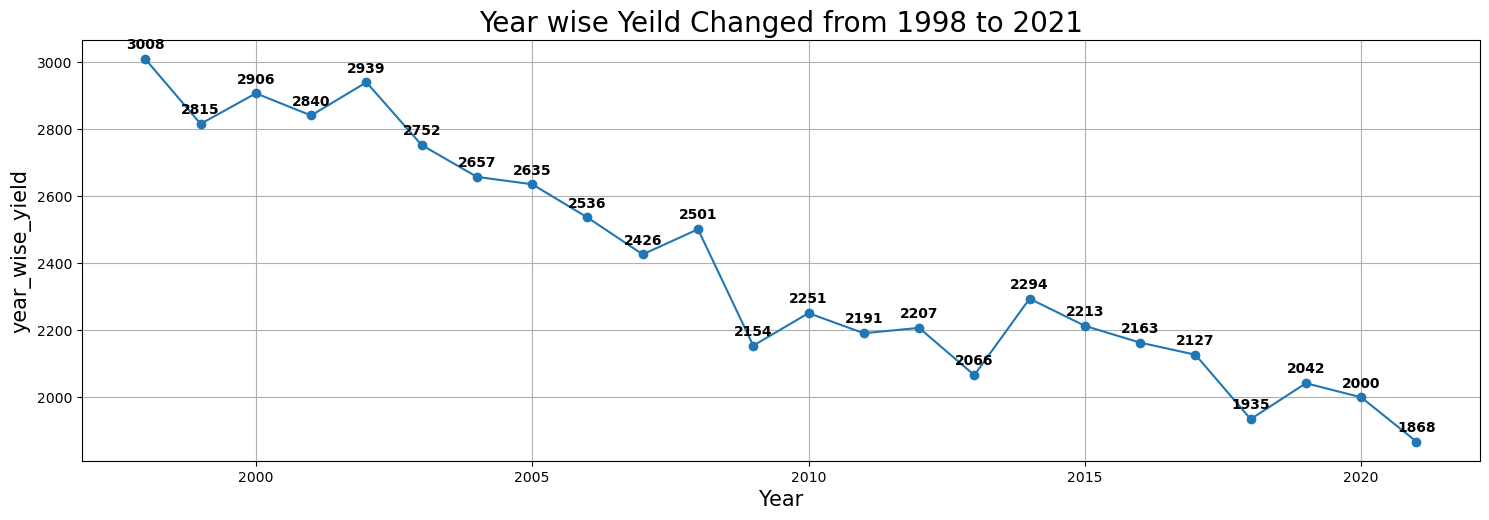

In [102]:
plt.figure(figsize=(15,5))
plt.plot(year_wise_yield['year'], year_wise_yield['year_wise_yield'], marker='o', markersize=6)
plt.xlabel('Year', fontsize=15)
plt.ylabel('year_wise_yield', fontsize=15)
plt.grid('True')
plt.tight_layout()
# for i , v in enumerate(year_wise_yield['year_wise_yield']):
#     plt.text(i,v, v)
for i, v in enumerate(year_wise_yield['year_wise_yield']):
    plt.text(year_wise_yield['year'][i], v + 30, str(v), ha='center',weight='bold' )
plt.title('Year wise Yeild Changed from 1998 to 2021', fontsize='20')

Insights:The code summarizes the <b>total yield per colony (yieldpercol) for each year</b> in the dataset. <b>It groups the data by year, calculates the sum of yieldpercol for each year</b>, and sorts the results by year in ascending order.

# Q2. Overtime, what are the major production trends across the states?

In [30]:
df

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
980,Virginia,6000.0,40,240000.0,79000.0,8.23,1975000.0,2021
981,Washington,96000.0,32,3072000.0,1206000.0,2.52,7741000.0,2021
982,West Virginia,6000.0,43,258000.0,136000.0,4.80,1238000.0,2021
983,Wisconsin,42000.0,47,1974000.0,750000.0,2.81,5547000.0,2021


In [340]:
top5_state_highest_prod = df.groupby(df['State'])['totalprod'].mean().reset_index(name='sum_of_prod').sort_values(by='sum_of_prod', ascending=False).iloc[:5]

top5_state_lowest_prod = df.groupby(df['State'])['totalprod'].sum().reset_index(name='sum_of_prod').sort_values(by='sum_of_prod', ascending=True).iloc[:5]

state_wise_honey_prod = df.groupby(df['State'])['totalprod'].sum().reset_index(name='sum_of_prod').sort_values(by='sum_of_prod', ascending=False)
#state_year_wise_production = df.pivot(index='year', columns='State', values='totalprod').sort_values(by='totalprod',ascending=True)
#state_year_wise_production
#df.groupby(df['State'])['totalprod'].mean().reset_index(name='sum_of_prod').sort_values(by='sum_of_prod', ascending=False).iloc[:5]

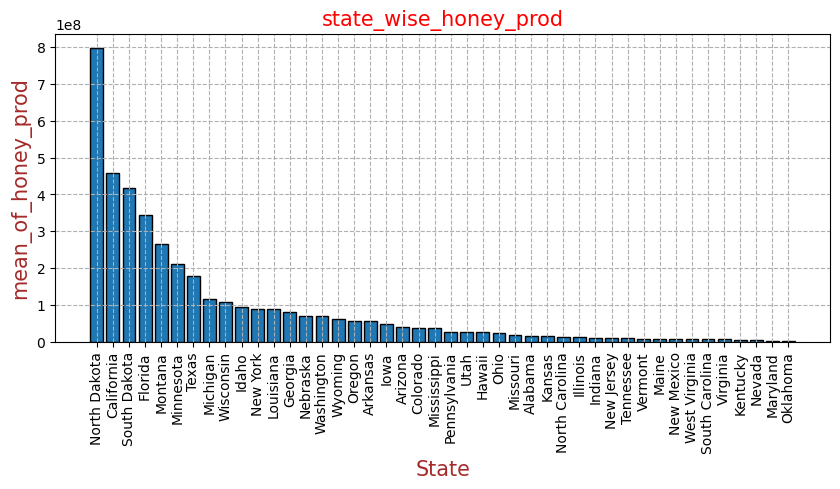

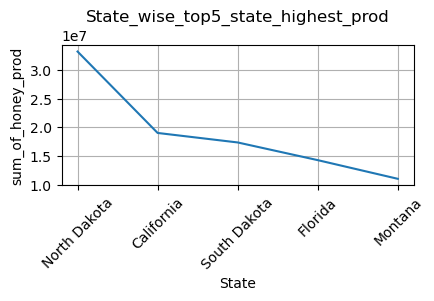

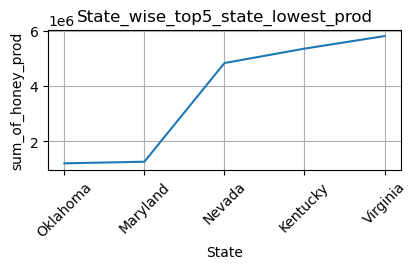

In [341]:
plt.figure(figsize=(10,4))
# plt.subplot(2,2,3)
plt.bar(state_wise_honey_prod['State'],state_wise_honey_prod['sum_of_prod'], edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('State', fontsize='15', color='Brown')
plt.ylabel('mean_of_honey_prod',fontsize='15', color='Brown')
plt.grid(linestyle='--')
plt.title('state_wise_honey_prod', fontsize='15', color='Red')
plt.show()




plt.figure(figsize=(10,4))
plt.subplot(2,2,2)
plt.plot(top5_state_highest_prod['State'], top5_state_highest_prod['sum_of_prod'])
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('sum_of_honey_prod')
plt.grid('True')
plt.title('State_wise_top5_state_highest_prod')
plt.show()





plt.figure(figsize=(10,4))
plt.subplot(2,2,3)
plt.plot(top5_state_lowest_prod['State'], top5_state_lowest_prod['sum_of_prod'])
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('sum_of_honey_prod')
plt.grid('True')
plt.title('State_wise_top5_state_lowest_prod')
plt.show()



<b>Bar Plot - State-wise Total Honey Production:</b>

Each bar represents the total honey production for a state.<br>
<br>The bars are sorted by state name for better readability.
<br>The plot helps visualize the total honey production across different states.
<br><b>Line Plot - Top 5 States with Highest Production:</b>


<br>Each point represents the total honey production for a state.
<br>States are labeled on the X-axis, and the corresponding production values are shown on the Y-axis.
<br>The plot helps identify the top 5 states with the highest honey production.
<br><b>Line Plot - Top 5 States with Lowest Production:</b>


<br>Each point represents the total honey production for a state.
<br>States are labeled on the X-axis, and the corresponding production values are shown on the Y-axis.
<br>The plot helps identify the top 5 states with the lowest honey production.

# Q3) Does the data show any trends in terms of the number of honey-producing colonies and yield per colony before 2006,which was when concernover Colony Collapse Disorder spread nation wide?

In [343]:
df_before_2006 = df[df['year'] < 2006] 
#df_before_2006
df_before_2006[['year','numcol', 'yieldpercol']]

honey_producing_colonies_and_yield_per_colony_before_2006 = df_before_2006.groupby(['year'])[['numcol','yieldpercol']].mean().reset_index()

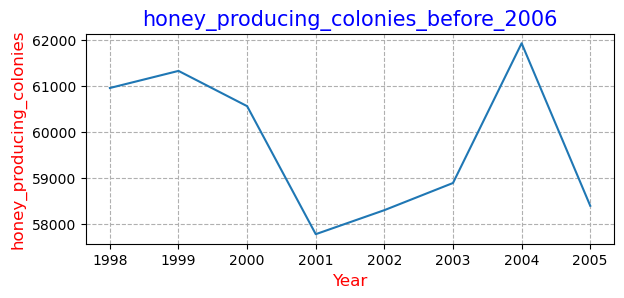

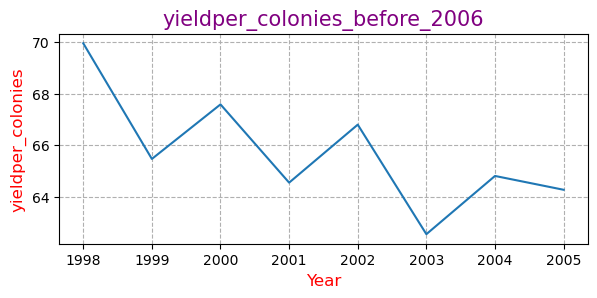

In [344]:

plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.plot(honey_producing_colonies_and_yield_per_colony_before_2006['year'],honey_producing_colonies_and_yield_per_colony_before_2006['numcol'])
plt.xlabel('Year', fontsize=
          '12', color='red')
plt.ylabel('honey_producing_colonies',fontsize=
          '12', color='red')
plt.grid(ls='--')
plt.title('honey_producing_colonies_before_2006',fontsize='15', color='blue')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(2,2,3)
plt.plot(honey_producing_colonies_and_yield_per_colony_before_2006['year'],honey_producing_colonies_and_yield_per_colony_before_2006['yieldpercol'])
plt.xlabel('Year', fontsize=
          '12', color='red')
plt.ylabel('yieldper_colonies',fontsize=
          '12', color='red')
plt.grid(ls='--')
plt.title('yieldper_colonies_before_2006',fontsize='15', color='Purple')
plt.show()
#plt.plot(honey_producing_colonies_and_yield_per_colony_before_2006['year'],honey_producing_colonies_and_yield_per_colony_before_2006['yieldpercol'])





<b>Line Plot - Honey Producing Colonies Before 2006:</b>

<br>X-axis: Year
<br>Y-axis: Number of honey-producing colonies
<br>Each point represents the number of honey-producing colonies in a given year before 2006.
<br>The plot shows trends and changes in the number of honey-producing colonies over the years.


<b>Line Plot - Yield per Colony Before 2006:</b>

<br>X-axis: Year
<br>Y-axis: Yield per colony
<br>Each point represents the yield per colony in a given year before 2006.
<br>The plot shows trends and changes in the yield per colony over the years.

# Q4) Are there any patterns that can be observed between total honey production and the value of production every year?


In [345]:

df[['year','totalprod', 'prodvalue']]

totalprod_vs_prod_value = df.groupby(['year'])[['totalprod','prodvalue']].sum().reset_index()

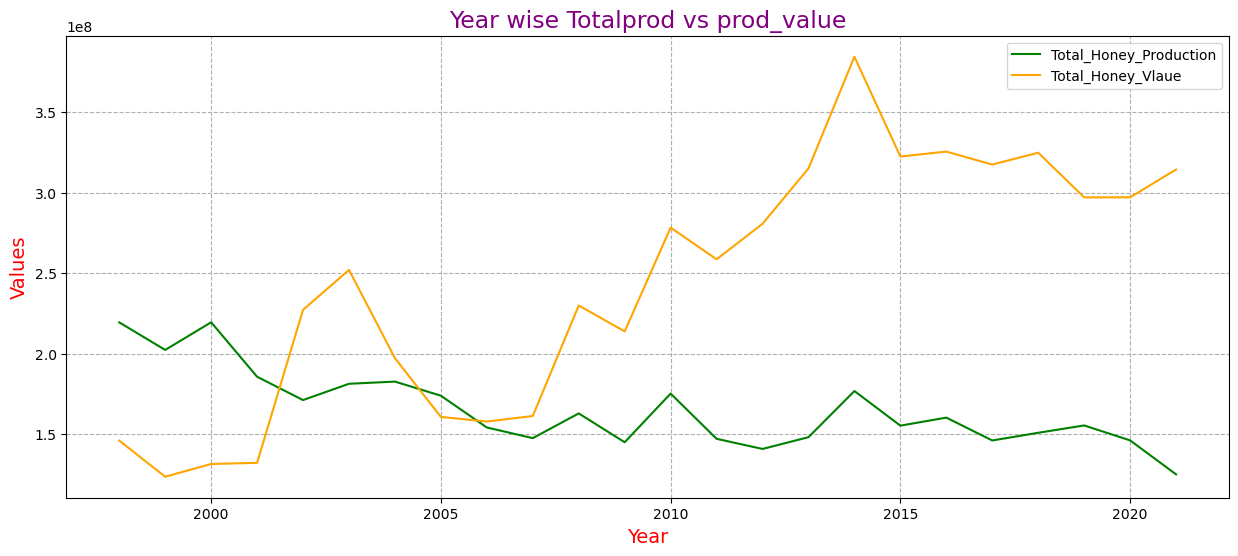

In [346]:
plt.figure(figsize=(15,6))
plt.plot(totalprod_vs_prod_value['year'], totalprod_vs_prod_value['totalprod'], color='green', label='Total_Honey_Production')
plt.plot(totalprod_vs_prod_value['year'],totalprod_vs_prod_value['prodvalue'],color='orange', label='Total_Honey_Vlaue')
plt.xlabel('Year', fontsize=
          '14', color='red')
plt.ylabel('Values',fontsize=
          '14', color='red')
plt.grid(ls='--')
plt.legend()
plt.title('Year wise Totalprod vs prod_value',fontsize='17', color='Purple', )
plt.show()

# plt.figure(figsize=(15,6))
# plt.subplot(2,2,2)
# plt.plot(totalprod_vs_prod_value['year'],totalprod_vs_prod_value['totalprod'],color='orange')
# plt.show()

<b>Line Plot - Year-wise Total Honey Production vs. Production Value:</b>

<br>X-axis: Year
<br>Y-axis: Values (representing both total honey production and its value)
<br>Green Line: Represents total honey production over the years.
<br>Orange Line: Represents the total value of honey production over the years.
<br>Legend: The legend differentiates between the two lines, with labels "Total_Honey_Production" and "Total_Honey_Value."


# Q5. How has the value of production, which in some sense could be tied to demand, changed everyy ear?


In [347]:
#Q5. How has the value of production, which in some sense could be tied to demand, changed everyy ear?

df[['year','totalprod']]

Year_wise_prodvalue = df.groupby('year')['prodvalue'].sum().reset_index(name='sumOfTotalProd')

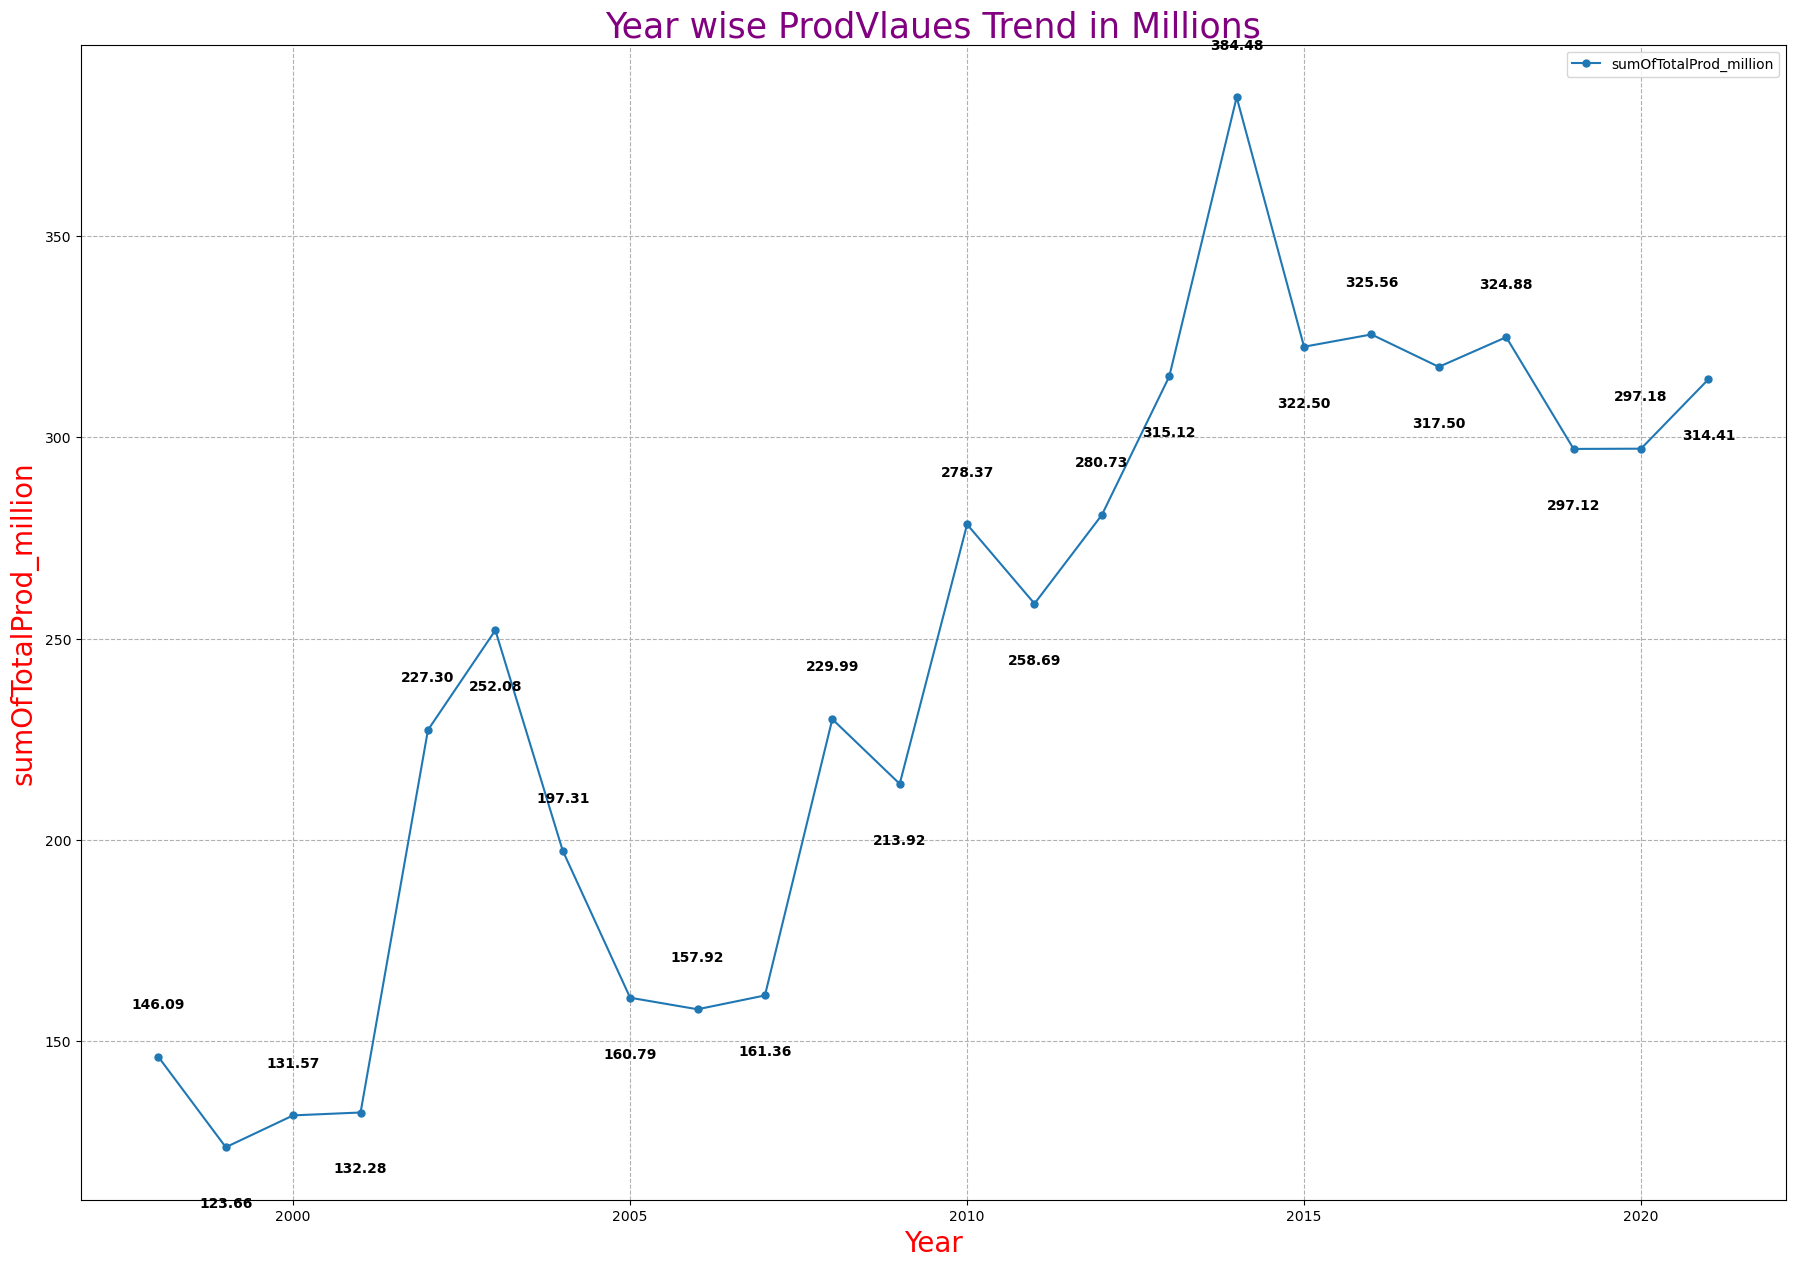

In [348]:
plt.figure(figsize=(22,15))
Year_wise_prodvalue['sumOfTotalProd_million'] = Year_wise_prodvalue['sumOfTotalProd'] / 1000000

plt.plot(Year_wise_prodvalue['year'], Year_wise_prodvalue['sumOfTotalProd_million'], label='sumOfTotalProd_million', marker='o', markersize=5)
plt.xlabel('Year', fontsize=
          '20', color='red')
plt.ylabel('sumOfTotalProd_million',fontsize=
          '20', color='red')
plt.grid(ls='--')
for i, v in enumerate(Year_wise_prodvalue['sumOfTotalProd_million']):
    offset = 12 if i % 2 == 0 else -15
    plt.text(Year_wise_prodvalue['year'][i], v + offset, f'{v:.2f}', ha='center', weight='bold')
plt.legend()
plt.title('Year wise ProdVlaues Trend in Millions',fontsize='25', color='Purple', )
plt.show()

<b>Trends in Production Values:</b>

<br>The plot shows the trend of total production values (in millions) over the years.
<br>Each data point is annotated with its exact value (in millions), which helps in quickly understanding the magnitude of production for each year.
<br>The alternating offset for the text annotations ensures readability and prevents overlapping of the text.
<br>By observing the line's progression, you can identify periods of increase, decrease, or stability in production values.
<br>The plot helps in comparing production values across different years, making it clear which years had higher or lower production values.
<br>Peaks and troughs in the line can highlight the most and least productive years.
